Epoch 1/20
625/625 [==============================] - 21s 32ms/step - loss: 1.8847 - accuracy: 0.3135 - val_loss: 1.7872 - val_accuracy: 0.3541
Epoch 2/20
625/625 [==============================] - 22s 35ms/step - loss: 1.6930 - accuracy: 0.3896 - val_loss: 1.6534 - val_accuracy: 0.4106
Epoch 3/20
625/625 [==============================] - 19s 31ms/step - loss: 1.6110 - accuracy: 0.4223 - val_loss: 1.6110 - val_accuracy: 0.4237
Epoch 4/20
625/625 [==============================] - 21s 33ms/step - loss: 1.5508 - accuracy: 0.4424 - val_loss: 1.6756 - val_accuracy: 0.4063
Epoch 5/20
625/625 [==============================] - 21s 33ms/step - loss: 1.5085 - accuracy: 0.4573 - val_loss: 1.5589 - val_accuracy: 0.4452
Epoch 6/20
625/625 [==============================] - 20s 31ms/step - loss: 1.4743 - accuracy: 0.4729 - val_loss: 1.5077 - val_accuracy: 0.4760
Epoch 7/20
625/625 [==============================] - 22s 35ms/step - loss: 1.4413 - accuracy: 0.4854 - val_loss: 1.5450 - val_accuracy:

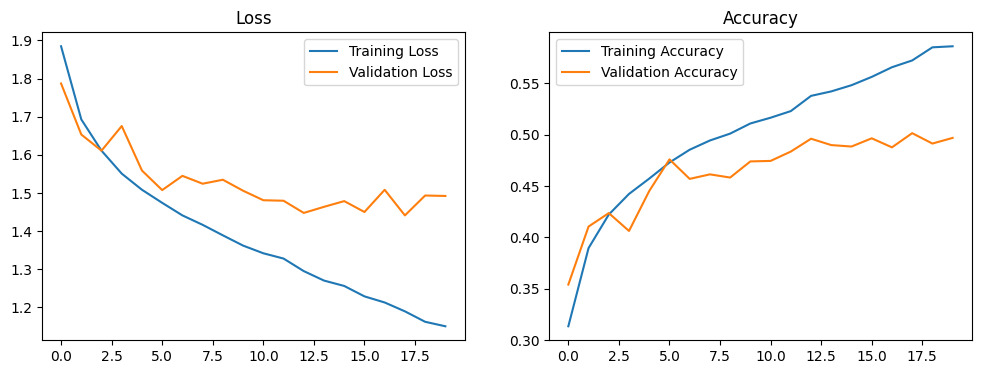

Test Accuracy: 49.95%
1/1 [==============================] - 0s 62ms/step


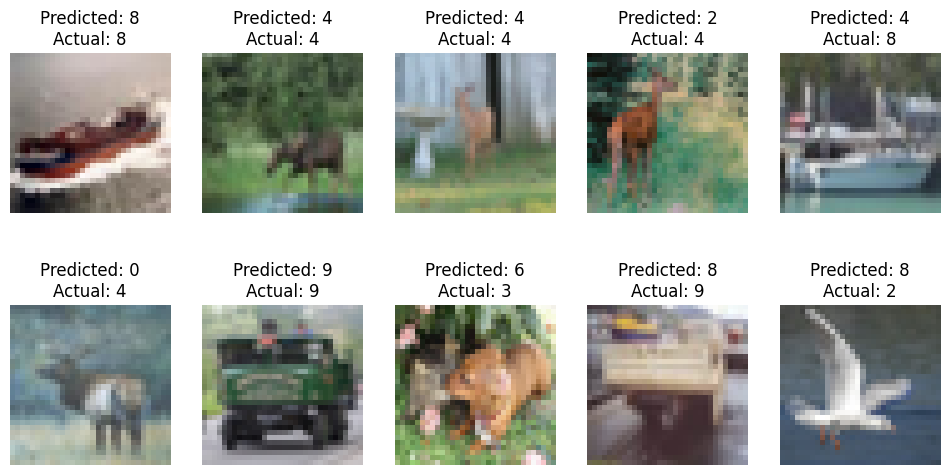

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(512, input_shape=(32*32*3,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train.reshape((-1, 32*32*3)), y_train, epochs=20, batch_size=64, validation_split=0.2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

accuracy = model.evaluate(x_test.reshape((-1, 32*32*3)), y_test, verbose=0)
print(f'Test Accuracy: {accuracy[1]*100:.2f}%')

random_indices = np.random.choice(len(x_test), size=10, replace=False)
random_images = x_test[random_indices]
predictions = model.predict(random_images.reshape((-1, 32*32*3)))
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(random_images[i])
    plt.title(f'Predicted: {predicted_classes[i]}\nActual: {np.argmax(y_test[random_indices[i]])}')
    plt.axis('off')

plt.show()

model.summary()

